# Task-3(To Explore Unsupervised Machine Learning)
K-Means Clustering:To predict the optimum number of clusters and represent it visually.
Presented By-Harshada Suresh Sonawane

# K-Means Clustering

In [3]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
%matplotlib inline
sns.set()

In [4]:
#load the dataset
iris=datasets.load_iris()
iris_df=pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
#Describe the data
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


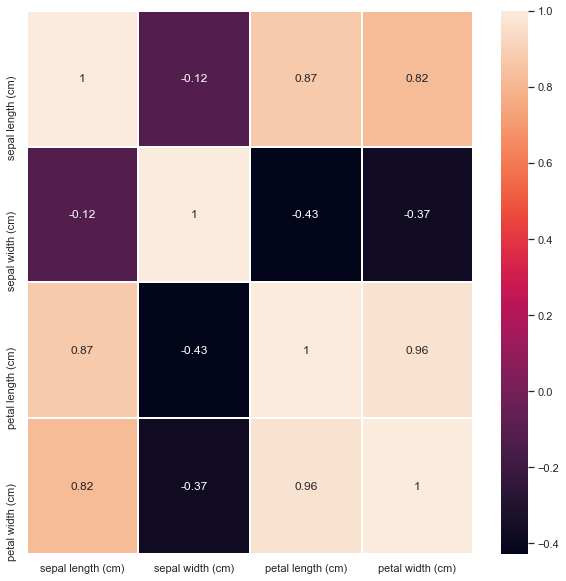

In [6]:
fig=plt.figure(figsize=(10,10))
sns.heatmap(iris_df.corr(),linewidths=1, annot=True)

<function matplotlib.pyplot.show(*args, **kw)>

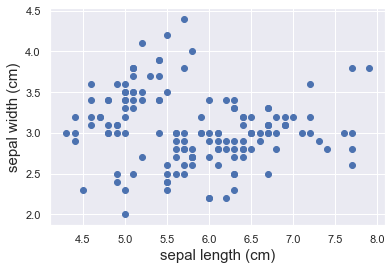

In [7]:
#visualising relation between features
plt.scatter(x= 'sepal length (cm)', y='sepal width (cm)', data=iris_df, color='b')
plt.xlabel('sepal length (cm)', fontsize=15)
plt.ylabel('sepal width (cm)', fontsize=15)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

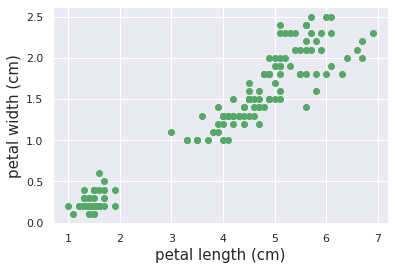

In [6]:
#visualising relation between features
plt.scatter(x= 'petal length (cm)', y='petal width (cm)', data=iris_df, color='g')
plt.xlabel('petal length (cm)', fontsize=15)
plt.ylabel('petal width (cm)', fontsize=15)
plt.show

In [7]:
#Finding k using elbow method
wcss=[]
k_range=10
for i in range (1, k_range):
    k=KMeans(i)
    k.fit(iris_df)
    w=k.inertia_
    wcss.append(w)
wcss

[681.3705999999996,
 152.34795176035797,
 78.851441426146,
 57.22847321428572,
 46.44618205128204,
 39.03998724608725,
 34.299712121212146,
 30.064593073593088,
 27.89549464570519]

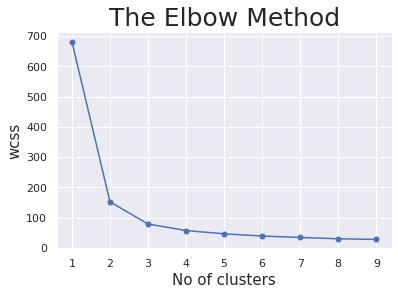

In [8]:
clusters=range(1,k_range)
plt.plot(clusters, wcss, marker='.', color="b", markersize=10 )
plt.xlabel('No of clusters', fontsize=15 )
plt.ylabel('wcss', fontsize=15)
plt.title('The Elbow Method', fontsize=25)
plt.show()

We can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares doesn't decrease significantly with every iteration.

From this we choose the number of clusters as 3.

In [9]:
kmeans= KMeans(3)
kmeans.fit(iris_df)

KMeans(n_clusters=3)

In [10]:
centers=kmeans.cluster_centers_
print(centers)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [12]:
iris_pred=iris_df.copy()
iris_pred['predicted']=kmeans.fit_predict(iris_df)

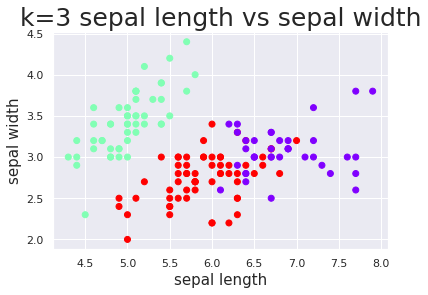

In [13]:
#visualizing cluster according to predicted value for sepal length and sepal width
plt.scatter(x='sepal length (cm)', y='sepal width (cm)', c='predicted', cmap='rainbow', data=iris_pred)
plt.xlabel('sepal length', fontsize=15)
plt.ylabel('sepal width', fontsize=15)
plt.title('k=3 sepal length vs sepal width', fontsize=25)
plt.show()


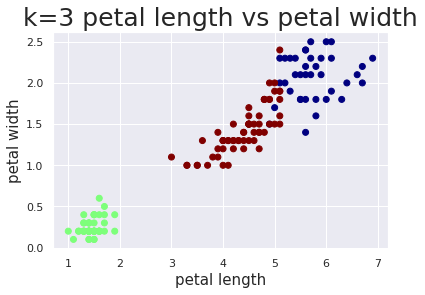

In [14]:
#visualizing cluster according to predicted value for petal length and petal width
plt.scatter(x='petal length (cm)', y='petal width (cm)', c='predicted', cmap='jet', data=iris_pred)
plt.xlabel('petal length', fontsize=15)
plt.ylabel('petal width', fontsize=15)
plt.title('k=3 petal length vs petal width', fontsize=25)
plt.show()

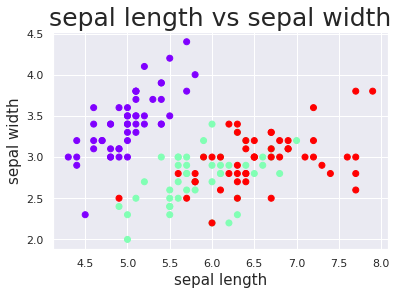

In [16]:
#visualizing cluster for true labels
plt.scatter(x='sepal length (cm)', y='sepal width (cm)', c=iris.target, cmap='rainbow', data=iris_df)
plt.xlabel('sepal length', fontsize=15)
plt.ylabel('sepal width', fontsize=15)
plt.title('sepal length vs sepal width', fontsize=25)
plt.show()

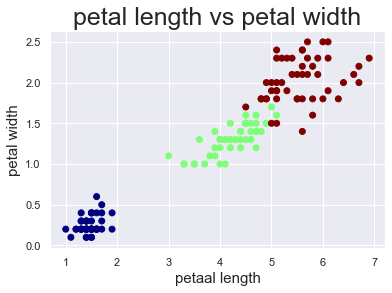

In [8]:
#visualizing cluster for true labels
plt.scatter(x='petal length (cm)', y='petal width (cm)', c=iris.target, cmap='jet', data=iris_df)
plt.xlabel('petaal length', fontsize=15)
plt.ylabel('petal width', fontsize=15)
plt.title('petal length vs petal width', fontsize=25)
plt.show()

Visualizing the cluster for true values we can say that k=3 is appropriate solution for iris dataset.